In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [28]:
df = pd.read_csv('Cricket.csv')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar�(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara�(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting�(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya�(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene�(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [29]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [30]:
def getyears(x):
    [year1, year2] = x.split('-')
    duration = int(year2) - int(year1)
    return duration
    
df['Span'] = df['Span'].apply(lambda x : getyears(x))

In [31]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar�(INDIA),23,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara�(Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting�(AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya�(Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene�(Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [32]:
df['HS'] = df['HS'].apply(lambda x: x.strip('*'))

In [33]:
df['HS']  = df['HS'].astype('int64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     int64  
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     int64  
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [35]:
#Scaling the data
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [36]:
df_numeric = df[['Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0']]

In [37]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df_numeric)

In [41]:
scaled_df.shape

(79, 12)

In [42]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0']
scaled_df.head()

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,2.812787,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837
1,0.380938,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671
2,0.988900,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837
3,2.508806,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501
4,0.988900,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502


In [44]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [45]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 3, 0, 1, 0,
       0, 3, 1, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3], dtype=int32)

In [46]:
df['cluster'] = kmeans.labels_
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
0,SR Tendulkar�(INDIA),23,463,452,41,18426,200,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara�(Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting�(AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
3,ST Jayasuriya�(Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2
4,DPMD Jayawardene�(Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2


In [47]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster
0,SR Tendulkar�(INDIA),23,463,452,41,18426,200,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara�(Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting�(AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
3,ST Jayasuriya�(Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2
4,DPMD Jayawardene�(Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge�(WI),16,128,127,13,5134,133,45.03,7908,64.92,11,31,3,3
75,Misbah-ul-Haq�(PAK),13,162,149,31,5122,96,43.40,6945,73.75,0,42,6,3
76,PD Collingwood�(ENG),10,197,181,37,5092,120,35.36,6614,76.98,5,26,7,3
77,A Symonds�(AUS),11,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1


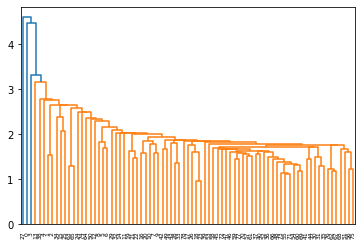

In [48]:
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

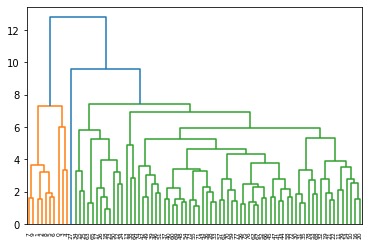

In [50]:
# complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
df['h_cluster'] = cluster_labels
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,cluster,h_cluster
0,SR Tendulkar�(INDIA),23,463,452,41,18426,200,44.83,21367,86.23,49,96,20,2,0
1,KC Sangakkara�(Asia/ICC/SL),15,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2,0
2,RT Ponting�(AUS/ICC),17,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2,0
3,ST Jayasuriya�(Asia/SL),22,445,433,18,13430,189,32.36,14725,91.20,28,68,34,2,0
4,DPMD Jayawardene�(Asia/SL),17,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2,0
